In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import pickle
import IPython.display as ipd
import librosa.display
%matplotlib inline

In [49]:
import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras

In [21]:
data = pd.read_pickle("../Data/Piano/data-piano-reduced.pkl")
data = data.reset_index(drop=True)
data["Note"] = librosa.midi_to_note(data["Note"] + 49)

In [22]:
sample = data.sample()

In [23]:
sample["Note"]

1278    G#5
Name: Note, dtype: object

In [24]:
y = sample[["x{}".format(i) for i in range(16000)]].values[0]

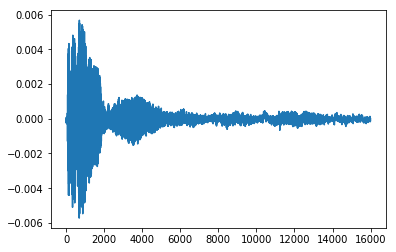

In [25]:
plt.plot(y)

In [26]:
cqt = librosa.core.cqt(y, 8000, n_bins=80)

e:\anaconda\envs\tfm\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


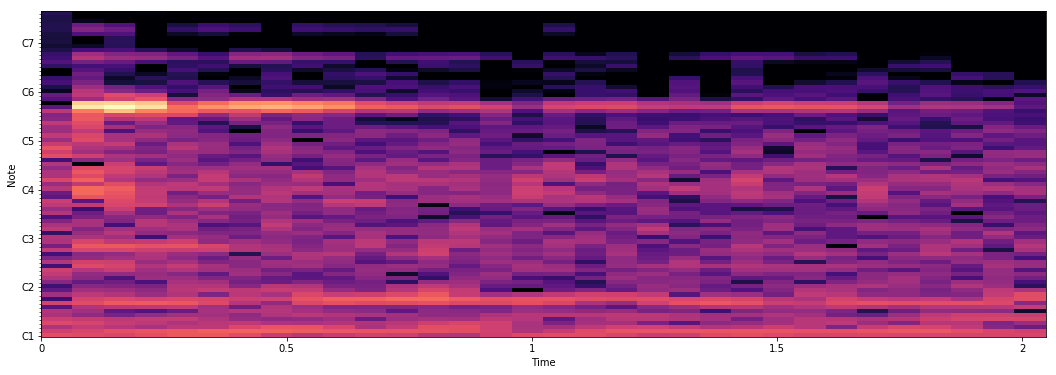

In [27]:
plt.figure(figsize=(18,6))
librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max),
                         sr=8000, x_axis='time', y_axis='cqt_note')

In [28]:
librosa.amplitude_to_db(cqt, ref=np.max).shape

(80, 32)

In [29]:
librosa.amplitude_to_db(cqt, ref=np.max).mean(axis=1).argmax()

56

In [30]:
librosa.note_to_midi(sample["Note"])[0]

80

In [31]:
l = []
for row in tqdm(data[["x{}".format(i) for i in range(16000)]].values):
    cqt = librosa.core.cqt(row, 8000, n_bins=80)
    l.append(librosa.amplitude_to_db(cqt, ref=np.max).mean(axis=1).argmax()+24)

e:\anaconda\envs\tfm\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [32]:
data["Pred_note"] = l

In [33]:
(librosa.note_to_midi(data["Note"]) == data["Pred_note"]).mean()

0.8074324324324325

In [34]:
(librosa.note_to_midi(data["Note"]) == data["Pred_note"]).values

array([False,  True, False, ..., False, False, False])

In [35]:
misclass = data[(librosa.note_to_midi(data["Note"]) != data["Pred_note"])]

In [36]:
for i in range(misclass.shape[0]):
    row = misclass.iloc[i]
    print(row["Note"], librosa.midi_to_note(row["Pred_note"]))

C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
C#3 C#4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
E3 E4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F3 F4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
F#3 F#4
G3 G4
G3 G4
G3 G4
G3 G4
G3 G4
G3 G4
G3 G4
G3 G4
G3 G4
G3 G4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
G#3 G#4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A3 A4
A#3 A#4
A#3 A#4
A#3 A#4
A#3 A#4
A#3 A#4
A#3 A#4
A#

In [40]:
index_octshift = (abs(librosa.note_to_midi(data["Note"]) - data["Pred_note"]) == 12) | (abs(librosa.note_to_midi(data["Note"]) - data["Pred_note"]) == 24)
print(round(len(data["Pred_note"][index_octshift])/len(data["Pred_note"][(librosa.note_to_midi(data["Note"]) != data["Pred_note"])])*100), 
          "% of the misclassified examples are actually octave misclassifications")

87 % of the misclassified examples are actually octave misclassifications


## CQT NN

In [41]:
def create_xy(df, target_column):
    return df.drop(target_column, axis=1), df[target_column]

def split_data(df, target_column):
    X_train, y_train = create_xy(df.sample(round(0.8*df.shape[0])), target_column)
    df = df.drop(X_train.index)
    X_val, y_val = create_xy(df.sample(round(0.5*df.shape[0])), target_column)
    df = df.drop(X_val.index)
    X_test, y_test = create_xy(df, target_column)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [42]:
data[["x{}".format(i) for i in range(16000)]].values[0]

array([9.69390931e-06, 1.60864856e-05, 1.52890170e-05, ...,
       8.20495747e-03, 1.19816056e-02, 1.38008287e-02])

In [43]:
a_index = ["a{}".format(i) for i in range(2560)]
data_cqt = pd.DataFrame(columns=["Note", "Piano"] + a_index)
data_cqt["Note"] = data["Note"]
data_cqt["Piano"] = data["Piano"]

for r in tqdm(range(data.shape[0])):
    row = data[["x{}".format(i) for i in range(16000)]].values[r]
    cqt = librosa.core.cqt(row, 8000, n_bins=80)
    data_cqt.iloc[r, 2:] = librosa.amplitude_to_db(cqt, ref=np.max).flatten()

e:\anaconda\envs\tfm\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [44]:
data_cqt.to_pickle("../Data/Piano/data_cqt.pkl")

In [45]:
data_cqt = pd.read_pickle("../Data/Piano/data_cqt.pkl")

In [46]:
data_cqt["Note"] = librosa.note_to_midi(data_cqt["Note"]) -49

In [47]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data_cqt.drop("Piano", axis=1), "Note")

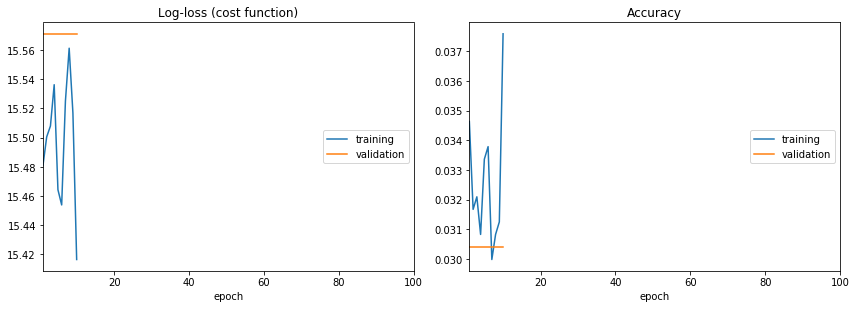

Log-loss (cost function):
training   (min:   15.416, max:   15.561, cur:   15.416)
validation (min:   15.571, max:   15.571, cur:   15.571)

Accuracy:
training   (min:    0.030, max:    0.038, cur:    0.038)
validation (min:    0.030, max:    0.030, cur:    0.030)


KeyboardInterrupt: 

In [65]:
inputs = Input(shape=(2560,))
hidden1 = Dense(256, kernel_regularizer=l1(0.0000))(inputs)
hidden2 = Dense(128, kernel_regularizer=l2(0.00), activation="relu")(hidden1)
hidden2_drop = Dropout(0.4)(hidden2)
preds = Dense(35, activation="softmax")(hidden2_drop)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=1e-15)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

In [62]:
a = np.zeros((80,32))

for i in range(80):
    a[i,:] = data_cqt.iloc[0,2+i*32:2+i*32+32]

In [63]:
a

array([[-51.93172126, -52.85351944, -55.45866444, ..., -60.20756602,
        -63.72273057, -76.10358778],
       [-48.90841479, -51.38798552, -56.5259831 , ..., -60.10696655,
        -60.20013442, -60.15005935],
       [-42.81537174, -43.70032362, -45.57951184, ..., -62.89360077,
        -61.97279122, -64.0546497 ],
       ...,
       [-80.        , -49.99318839, -46.17480682, ..., -64.54663153,
        -67.02104023, -74.12309904],
       [-80.        , -43.35285094, -43.68613742, ..., -75.73309179,
        -66.60455388, -68.44810665],
       [-80.        , -34.77102169, -35.71185731, ..., -71.01828388,
        -68.73699673, -62.66843161]])

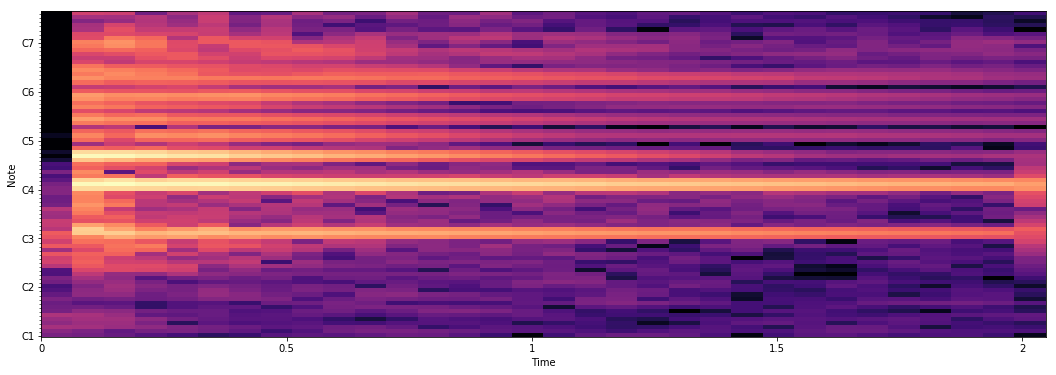

In [64]:
plt.figure(figsize=(18,6))
librosa.display.specshow(a, sr=8000, x_axis='time', y_axis='cqt_note')